## Download the data

In [10]:
!mkdir Dataset
# English: This command creates a new directory named 'Dataset' in the current working directory to store the downloaded files.
# ภาษาไทย: เป็นคำสั่งที่ใช้สร้างโฟลเดอร์ใหม่ชื่อ "Dataset" ซึ่งจำเป็นต้องทำเพื่อใช้เป็นที่เก็บไฟล์ข้อมูลที่เราจะดาวน์โหลดมาในขั้นตอนถัดไป ทำให้ข้อมูลของเราเป็นระเบียบและจัดการได้ง่าย

!wget https://zenodo.org/records/7189381/files/trainX.npy?download=1 -O Dataset/Xdata.npy
# English: This command downloads the 'trainX.npy' file from the specified URL and saves it as 'Xdata.npy' inside the 'Dataset' folder.
# ภาษาไทย: เป็นคำสั่งที่ใช้ดาวน์โหลดไฟล์ข้อมูลจากเว็บไซต์ที่ระบุ โดยไฟล์ 'trainX.npy' จะถูกดาวน์โหลดมาและบันทึกในชื่อ 'Xdata.npy' ในโฟลเดอร์ "Dataset" ซึ่งไฟล์นี้เป็นข้อมูลภาพที่ใช้สำหรับฝึกโมเดล

!wget https://zenodo.org/records/7189381/files/trainY.npy?download=1 -O Dataset/Ydata.npy
# English: This command downloads the 'trainY.npy' file from the specified URL and saves it as 'Ydata.npy' inside the 'Dataset' folder.
# ภาษาไทย: เป็นคำสั่งที่ใช้ดาวน์โหลดไฟล์ข้อมูลอีกไฟล์หนึ่ง ซึ่งคือ 'trainY.npy' โดยจะถูกบันทึกในชื่อ 'Ydata.npy' ในโฟลเดอร์ "Dataset" ซึ่งไฟล์นี้เป็นข้อมูล mask ที่เป็นคำตอบของรูปภาพใน 'Xdata.npy' และจะใช้ในการฝึกโมเดลของเรา

mkdir: cannot create directory ‘Dataset’: File exists
--2025-08-26 08:18:14--  https://zenodo.org/records/7189381/files/trainX.npy?download=1
Resolving zenodo.org (zenodo.org)... 188.185.48.194, 188.185.45.92, 188.185.43.25, ...
Connecting to zenodo.org (zenodo.org)|188.185.48.194|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 293339264 (280M) [application/octet-stream]
Saving to: ‘Dataset/Xdata.npy’

Dataset/Xdata.npy   100%[===================>] 279.75M  1.98MB/s    in 5m 8s   

2025-08-26 08:23:23 (931 KB/s) - ‘Dataset/Xdata.npy’ saved [293339264/293339264]

--2025-08-26 08:23:23--  https://zenodo.org/records/7189381/files/trainY.npy?download=1
Resolving zenodo.org (zenodo.org)... 188.185.43.25, 188.185.48.194, 188.185.45.92, ...
Connecting to zenodo.org (zenodo.org)|188.185.43.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73334912 (70M) [application/octet-stream]
Saving to: ‘Dataset/Ydata.npy’

Dataset/Ydata.npy   100%[=====

## Prepare paths of input images and target segmentation masks

In [11]:
import numpy as np #numpy numerical python
# English: This line imports the NumPy library for efficient numerical operations on arrays and matrices.
# ภาษาไทย: เป็นการนำเข้าไลบรารี NumPy ซึ่งมีความจำเป็นอย่างยิ่งสำหรับการจัดการข้อมูลเชิงตัวเลขในรูปแบบ Array ซึ่งเป็นพื้นฐานของงานด้าน AI ทำให้การคำนวณต่างๆ มีประสิทธิภาพและรวดเร็ว

import tensorflow as tf # tensorflow it is mostly used for deep learning tensor manipulation
# English: This line imports the TensorFlow library, a powerful framework for building and training machine learning models.
# ภาษาไทย: เป็นการนำเข้าไลบรารี TensorFlow ซึ่งเป็นเฟรมเวิร์กหลักที่ใช้ในการสร้างโมเดล AI ในโปรเจกต์นี้ เพราะมีความสามารถสูงในการจัดการกับ Tensor ซึ่งเป็นโครงสร้างข้อมูลหลักใน Deep Learning

import keras # backend of tensorflow
# English: This line imports the Keras library, a high-level API that simplifies the process of building and training neural networks.
# ภาษาไทย: เป็นการนำเข้าไลบรารี Keras ซึ่งเป็น API ที่ทำให้การสร้างและฝึกโมเดล AI ง่ายขึ้น โดย Keras จะทำงานอยู่บน TensorFlow ทำให้เราสามารถเขียนโค้ดได้สั้นลงและเข้าใจง่ายขึ้น

import matplotlib.pyplot as plt # plotting
# English: This line imports Matplotlib, a plotting library used for creating visualizations of data and model results.
# ภาษาไทย: เป็นการนำเข้าไลบรารี Matplotlib ซึ่งจำเป็นสำหรับการสร้างกราฟและแสดงผลลัพธ์ต่างๆ เช่น กราฟความแม่นยำหรือความสูญเสีย เพื่อช่วยให้เราเห็นภาพรวมของการฝึกโมเดลได้ชัดเจน

from sklearn.model_selection import train_test_split # split the dtaset into training and test
# English: This line imports a function from scikit-learn to split data into training and test sets.
# ภาษาไทย: เป็นการนำเข้าฟังก์ชัน train_test_split ซึ่งเป็นสิ่งสำคัญในการแบ่งข้อมูลออกเป็นชุดฝึกและชุดทดสอบ เพื่อให้เราสามารถประเมินประสิทธิภาพของโมเดลกับข้อมูลที่ไม่เคยเห็นได้จริง

import sklearn # Accuracy assessment,
# English: This line imports the scikit-learn library, which provides a wide range of tools for machine learning, including model evaluation metrics.
# ภาษาไทย: เป็นการนำเข้าไลบรารี scikit-learn ซึ่งเป็นเครื่องมือที่สำคัญสำหรับการประเมินผลลัพธ์ของโมเดล เช่น การคำนวณค่าความแม่นยำ (Accuracy) หรือการสร้าง Confusion Matrix

from tensorflow.keras import models
# English: This line imports the 'models' module from Keras, which contains classes for building different types of neural network models.
# ภาษาไทย: เป็นการนำเข้าโมดูล 'models' จาก Keras เพื่อใช้ในการสร้างโมเดลประเภทต่างๆ ซึ่งโมดูลนี้มีคลาสที่จำเป็นสำหรับการกำหนดโครงสร้างของโมเดลทั้งหมด

from tensorflow.keras.layers import *
# English: This line imports all layers from Keras, allowing you to easily add different types of layers to your neural network.
# ภาษาไทย: เป็นการนำเข้าเลเยอร์ (Layer) ทั้งหมดจาก Keras เพื่อให้สามารถใช้งานเลเยอร์ต่างๆ ได้อย่างสะดวกในการสร้างโครงข่ายประสาทเทียม เช่น Dense, Conv2D, หรือ MaxPooling

from tensorflow.keras.activations import *
# English: This line imports all activation functions from Keras, which are essential components of neural networks that introduce non-linearity.
# ภาษาไทย: เป็นการนำเข้าฟังก์ชันกระตุ้น (activation function) ทั้งหมดจาก Keras ซึ่งเป็นส่วนประกอบสำคัญของโมเดล AI ที่ช่วยให้โมเดลสามารถเรียนรู้ความสัมพันธ์ที่ซับซ้อนของข้อมูลได้

from tensorflow.keras.models import Sequential
# English: This line imports the Sequential model class, which is a straightforward way to build a neural network layer by layer.
# ภาษาไทย: เป็นการนำเข้าคลาส Sequential ซึ่งเป็นวิธีที่ง่ายที่สุดในการสร้างโมเดล AI โดยการนำเลเยอร์มาต่อกันเป็นลำดับ

In [12]:
Xdata = np.load("Dataset/Xdata.npy")
# English: This line loads the image data from the 'Xdata.npy' file, which was previously downloaded and stored in the 'Dataset' folder.
# ภาษาไทย: เป็นการโหลดไฟล์ 'Xdata.npy' ซึ่งเป็นไฟล์ข้อมูลรูปภาพที่ถูกจัดเก็บในรูปแบบ NumPy array เข้ามาในโปรแกรม เพื่อเตรียมข้อมูลสำหรับการฝึกโมเดล

Ydata = np.load("Dataset/Ydata.npy")
# English: This line loads the corresponding mask data from the 'Ydata.npy' file.
# ภาษาไทย: เป็นการโหลดไฟล์ 'Ydata.npy' ซึ่งเป็นไฟล์ข้อมูล mask หรือคำตอบของรูปภาพใน Xdata ที่ถูกจัดเก็บในรูปแบบ NumPy array เข้ามาในโปรแกรม

print(f"the shape of input image matrix is {Xdata.shape}")
# English: This line prints the shape (dimensions) of the loaded image data array, which is crucial for verifying that the data has been loaded correctly.
# ภาษาไทย: เป็นการแสดงขนาดของอาเรย์ข้อมูลรูปภาพ (Xdata) เพื่อตรวจสอบว่าข้อมูลที่โหลดเข้ามามีจำนวนรูปภาพ ความกว้าง และความสูง ตามที่เราคาดหวังหรือไม่ ซึ่งมีความสำคัญในการตรวจสอบความถูกต้องของข้อมูลก่อนนำไปใช้ในขั้นตอนต่อไป

the shape of input image matrix is (1119, 128, 128, 4)


## What does one input image and corresponding segmentation mask look like?

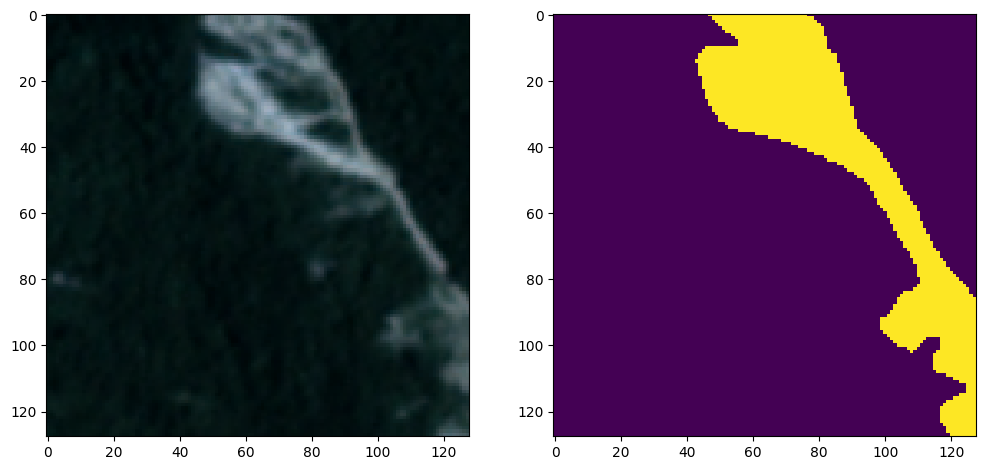

In [13]:
n = 289
# English: This line selects a specific image by its index from the dataset for visualization.
# ภาษาไทย: เป็นการกำหนดตัวแปรเพื่อเลือกรูปภาพและ mask ในตำแหน่งที่เราต้องการ โดยใช้หมายเลข 289 เป็นตัวอย่าง ซึ่งมีประโยชน์ในการตรวจสอบข้อมูลที่กำลังจะนำไปใช้

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
# English: This line creates a figure and a set of subplots arranged in 1 row and 2 columns, with an overall figure size of 12x6 inches.
# ภาษาไทย: เป็นการสร้างพื้นที่สำหรับแสดงรูปภาพ 2 รูปเคียงข้างกันในหน้าจอเดียว โดยจะสร้างพื้นที่ย่อย 2 ช่องใน 1 แถว ซึ่งทำให้ง่ายต่อการเปรียบเทียบระหว่างรูปภาพต้นฉบับกับ mask

ax[0].imshow(Xdata[n, :, :, :3].transpose((0, 1, 2)))
# English: This line displays the satellite image from the 'Xdata' array on the first subplot. The `.transpose((0, 1, 2))` is used to ensure the image is in the correct format (height, width, channels) for plotting.
# ภาษาไทย: เป็นการแสดงรูปภาพดาวเทียมจากอาเรย์ Xdata ในพื้นที่ย่อยที่หนึ่ง โดย `Xdata[n, :, :, :3]` คือการเลือกรูปภาพที่ n และ `transpose((0, 1, 2))` เป็นการจัดเรียงมิติของรูปภาพให้ถูกต้อง (ความสูง, ความกว้าง, จำนวนช่องสี) เพื่อให้รูปภาพแสดงผลได้อย่างสมบูรณ์

ax[1].imshow(Ydata[n, :, :, 0])
# English: This line displays the corresponding ground truth mask from the 'Ydata' array on the second subplot. The `[:, :, 0]` is used to select a single channel of the mask for visualization.
# ภาษาไทย: เป็นการแสดงไฟล์ mask ที่เป็นคำตอบที่ถูกต้องจากอาเรย์ Ydata ในพื้นที่ย่อยที่สอง โดย `[:, :, 0]` คือการเลือกช่องสีแรกของ mask ซึ่งแต่ละช่องสีอาจแทนคลาสที่แตกต่างกัน ทำให้เราเห็นการแบ่งส่วนของภาพได้ชัดเจน

ax[0].ticklabel_format(useOffset=False, style="plain")
# English: This line disables the scientific notation on the x and y axes of the first subplot, making the tick labels easier to read.
# ภาษาไทย: เป็นการตั้งค่าเพื่อไม่ให้แกน X และ Y ของรูปภาพแรกแสดงค่าในรูปแบบสัญกรณ์วิทยาศาสตร์ ซึ่งช่วยให้ตัวเลขบนแกนอ่านง่ายและเข้าใจได้มากขึ้น

ax[1].ticklabel_format(useOffset=False, style="plain")
# English: This line disables scientific notation on the axes of the second subplot for the same reason.
# ภาษาไทย: เป็นการตั้งค่าเพื่อไม่ให้แกน X และ Y ของรูปภาพที่สองแสดงค่าในรูปแบบสัญกรณ์วิทยาศาสตร์ ซึ่งช่วยให้ตัวเลขบนแกนอ่านง่ายเช่นกัน

## Prepare dataset to train validate and test the model

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    Xdata, Ydata, test_size=0.3, random_state=42
)
# English: This line splits the 'Xdata' and 'Ydata' into training and testing sets.
# ภาษาไทย: เป็นการแบ่งข้อมูลภาพ (Xdata) และ mask (Ydata) ออกเป็นสองส่วนคือ ชุดฝึก (train) และชุดทดสอบ (test) ซึ่งมีความสำคัญอย่างยิ่งในการประเมินประสิทธิภาพของโมเดล โดยจะใช้ 70% ของข้อมูลสำหรับฝึก และ 30% สำหรับทดสอบ

## Prepare U-Net model

In [15]:
def down_block(x, filters, use_maxpool=True):
# English: This function represents the contracting path of a U-Net model. It applies two convolutional layers followed by batch normalization and a LeakyReLU activation function.
# ภาษาไทย: เป็นฟังก์ชันสำหรับสร้าง "down block" ซึ่งเป็นส่วนของ Encoder (ทางลง) ในโมเดล U-Net โดยจะมีการใช้ Convolutional Layer สองชั้นตามด้วย Batch Normalization และ LeakyReLU เพื่อเรียนรู้คุณสมบัติของภาพและลดขนาดของภาพลงไปเรื่อยๆ

    x = Conv2D(filters, 3, padding="same")(x)
# English: A 2D convolutional layer that applies filters to the input, extracting features from the image.
# ภาษาไทย: เป็นชั้น Convolutional Layer ที่ทำหน้าที่สกัดคุณสมบัติต่างๆ ของรูปภาพ เช่น ขอบ หรือพื้นผิว โดย `Conv2D` จะช่วยให้โมเดลสามารถเรียนรู้รูปแบบที่สำคัญในภาพได้

    x = BatchNormalization()(x)
# English: This layer normalizes the activations of the previous layer, which helps in stabilizing and accelerating the training process.
# ภาษาไทย: เป็นการทำ Batch Normalization ที่จะปรับค่าของข้อมูลที่ผ่าน Convolutional Layer ให้มีค่าเฉลี่ยใกล้เคียง 0 และส่วนเบี่ยงเบนมาตรฐานใกล้เคียง 1 ซึ่งช่วยให้โมเดลเรียนรู้ได้ดีขึ้นและเร็วขึ้น

    x = LeakyReLU()(x)
# English: An activation function that introduces non-linearity, allowing the model to learn more complex patterns.
# ภาษาไทย: เป็นฟังก์ชันกระตุ้น (Activation Function) ที่ช่วยให้โมเดลสามารถเรียนรู้ความสัมพันธ์ที่ซับซ้อนของข้อมูลได้

    x = Conv2D(filters, 3, padding="same")(x)
# English: A second convolutional layer to further refine the extracted features.
# ภาษาไทย: เป็น Convolutional Layer ชั้นที่สองเพื่อช่วยให้โมเดลสามารถเรียนรู้คุณสมบัติที่ซับซ้อนมากขึ้น

    x = BatchNormalization()(x)
# English: Another batch normalization layer to stabilize the training.
# ภาษาไทย: เป็น Batch Normalization อีกชั้นที่ช่วยให้การฝึกโมเดลมีเสถียรภาพมากขึ้น

    x = LeakyReLU()(x)
# English: A second activation function for introducing non-linearity.
# ภาษาไทย: เป็นฟังก์ชันกระตุ้นอีกชั้นที่ช่วยเพิ่มความสามารถในการเรียนรู้ของโมเดล

    if use_maxpool == True:
        return MaxPooling2D(strides=(2, 2))(x), x
# English: If `use_maxpool` is true, this line performs max-pooling to downsample the image, reducing its dimensions. It returns both the downsampled output and the original output for later use in the upsampling path.
# ภาษาไทย: เป็นการใช้ MaxPooling เพื่อลดขนาดของรูปภาพลงครึ่งหนึ่ง ซึ่งเป็นขั้นตอนสำคัญในส่วนของ Encoder เพื่อให้โมเดลเรียนรู้คุณสมบัติในระดับที่กว้างขึ้น และจะส่งผลลัพธ์สองอย่างกลับมา คือผลลัพธ์ที่ลดขนาดแล้วและผลลัพธ์ก่อนลดขนาดเพื่อนำไปใช้ในส่วน Up Block

    else:
        return x
# English: If max-pooling is not used, this line simply returns the output of the convolutional layers.
# ภาษาไทย: เป็นกรณีที่ไม่มีการลดขนาดของรูปภาพ โดยจะคืนค่าผลลัพธ์ของ Convolutional Layer เพียงอย่างเดียว ซึ่งจะใช้ในขั้นตอนสุดท้ายของ Encoder

---

def up_block(x, y, filters):
# English: This function represents the expansive path of a U-Net model, responsible for upsampling the features and concatenating them with features from the contracting path.
# ภาษาไทย: เป็นฟังก์ชันสำหรับสร้าง "up block" ซึ่งเป็นส่วนของ Decoder (ทางขึ้น) ในโมเดล U-Net โดยทำหน้าที่ขยายขนาดของภาพที่ถูกย่อลงมาและนำข้อมูลจาก Down Block มารวมเข้าด้วยกัน

    x = UpSampling2D()(x)
# English: This layer upsamples the input, increasing its dimensions.
# ภาษาไทย: เป็นการใช้ UpSampling เพื่อขยายขนาดของรูปภาพให้กลับมามีขนาดเท่าเดิม ซึ่งเป็นส่วนสำคัญในการสร้างภาพ Segmentation ให้มีขนาดเท่ากับรูปภาพต้นฉบับ

    x = Concatenate(axis=3)([x, y])
# English: This layer concatenates the upsampled feature map with the corresponding feature map from the downsampling path, providing more detailed information to the decoder.
# ภาษาไทย: เป็นการนำข้อมูลที่ถูกขยายขนาดแล้ว (x) มารวมเข้ากับข้อมูลจาก Down Block (y) ซึ่งเป็นขั้นตอนสำคัญของ U-Net ที่ช่วยให้โมเดลสามารถใช้คุณสมบัติในระดับที่ละเอียดจาก Down Block มาประกอบการตัดสินใจใน Up Block ได้อย่างแม่นยำ

    x = Conv2D(filters, 3, padding="same")(x)
# English: A convolutional layer to process the concatenated features.
# ภาษาไทย: เป็น Convolutional Layer ที่ใช้ในการประมวลผลข้อมูลที่ถูกนำมารวมกันแล้ว

    x = BatchNormalization()(x)
# English: Normalizes the batch, which helps in model training.
# ภาษาไทย: เป็นการทำ Batch Normalization ที่ช่วยให้การฝึกโมเดลมีเสถียรภาพ

    x = LeakyReLU()(x)
# English: An activation function to introduce non-linearity.
# ภาษาไทย: เป็นฟังก์ชันกระตุ้นที่ช่วยเพิ่มความสามารถในการเรียนรู้ของโมเดล

    x = Conv2D(filters, 3, padding="same")(x)
# English: A second convolutional layer for further feature processing.
# ภาษาไทย: เป็น Convolutional Layer ชั้นที่สองที่ใช้ในการประมวลผลคุณสมบัติที่ซับซ้อนขึ้น

    x = BatchNormalization()(x)
# English: Normalizes the batch.
# ภาษาไทย: เป็นการทำ Batch Normalization อีกชั้นที่ช่วยให้การฝึกโมเดลมีประสิทธิภาพ

    x = LeakyReLU()(x)
# English: An activation function for non-linearity.
# ภาษาไทย: เป็นฟังก์ชันกระตุ้นที่ช่วยเพิ่มความสามารถในการเรียนรู้

    return x
# English: Returns the output of the upsampling block.
# ภาษาไทย: เป็นการคืนค่าผลลัพธ์ของ Up Block ซึ่งเป็นรูปภาพที่ถูกประมวลผลแล้ว

---

def get_model(input_size=(128, 128, 4), *, classes, dropout):
# English: This function defines the full U-Net model architecture by combining the down and up blocks.
# ภาษาไทย: เป็นฟังก์ชันหลักที่ใช้สร้างโมเดล U-Net ทั้งหมด โดยจะเรียกใช้ฟังก์ชัน `down_block` และ `up_block` ที่สร้างไว้ เพื่อประกอบกันเป็นโครงสร้างโมเดลที่สมบูรณ์

    filter = [64, 128, 256, 512, 1024]
# English: A list of the number of filters for each convolutional layer in the down and up blocks.
# ภาษาไทย: เป็นการกำหนดจำนวน Filter หรือตัวกรองที่จะใช้ในแต่ละชั้นของ Convolutional Layer ซึ่งจำนวน Filter ที่เพิ่มขึ้นในแต่ละชั้นจะช่วยให้โมเดลเรียนรู้คุณสมบัติที่ซับซ้อนได้มากขึ้น

    input = Input(shape=input_size)
# English: This line defines the input layer of the model with the specified input shape.
# ภาษาไทย: เป็นการกำหนดขนาดของรูปภาพที่จะป้อนเข้าสู่โมเดล โดย `(128, 128, 4)` หมายถึงขนาดของรูปภาพ (กว้าง, สูง, จำนวนช่องสัญญาณ) ซึ่งในที่นี้คือ 128x128 และมี 4 ช่องสัญญาณ

    x, temp1 = down_block(input, filter[0])
# English: This line calls the `down_block` function to create the first block of the encoder.
# ภาษาไทย: เป็นการเรียกใช้ฟังก์ชัน `down_block` เพื่อสร้างบล็อกแรกของส่วน Encoder

    x, temp2 = down_block(x, filter[1])
# English: This line creates the second down block.
# ภาษาไทย: เป็นการสร้างบล็อกที่สองของ Encoder

    x, temp3 = down_block(x, filter[2])
# English: This line creates the third down block.
# ภาษาไทย: เป็นการสร้างบล็อกที่สามของ Encoder

    x, temp4 = down_block(x, filter[3])
# English: This line creates the fourth down block.
# ภาษาไทย: เป็นการสร้างบล็อกที่สี่ของ Encoder

    x = down_block(x, filter[4], use_maxpool=False)
# English: This line creates the bottleneck block, which is the last layer of the encoder, without using max-pooling.
# ภาษาไทย: เป็นการสร้างบล็อกสุดท้ายของส่วน Encoder ซึ่งเป็น "คอขวด" ของโมเดล โดยจะไม่มีการใช้ Max Pooling เพื่อลดขนาดของภาพอีก

    x = up_block(x, temp4, filter[3])
# English: This line calls the `up_block` function to start the decoder path by upsampling and concatenating features.
# ภาษาไทย: เป็นการเรียกใช้ฟังก์ชัน `up_block` เพื่อเริ่มต้นส่วน Decoder โดยจะทำการขยายขนาดภาพที่ถูกย่อมาและนำไปรวมกับข้อมูลจากบล็อกที่สี่ของ Encoder

    x = up_block(x, temp3, filter[2])
# English: This line creates the second up block.
# ภาษาไทย: เป็นการสร้างบล็อกที่สองของส่วน Decoder

    x = up_block(x, temp2, filter[1])
# English: This line creates the third up block.
# ภาษาไทย: เป็นการสร้างบล็อกที่สามของส่วน Decoder

    x = up_block(x, temp1, filter[0])
# English: This line creates the fourth up block, which upsamples to the original input size.
# ภาษาไทย: เป็นการสร้างบล็อกที่สี่ของส่วน Decoder โดยจะทำการขยายขนาดภาพกลับมาเท่ากับขนาดของรูปภาพต้นฉบับ

    x = Dropout(dropout)(x)
# English: This layer randomly sets a fraction of input units to 0 at each update during training, which helps prevent overfitting.
# ภาษาไทย: เป็นการใช้ Dropout ซึ่งเป็นเทคนิคที่ใช้ในการป้องกันปัญหา Overfitting โดยจะสุ่มปิดการทำงานของ Neuron ในเลเยอร์นี้บางส่วนในระหว่างการฝึก เพื่อไม่ให้โมเดลจำข้อมูลได้แม่นยำเกินไป

    output = Conv2D(classes, 1, activation="sigmoid")(x)
# English: This is the final layer of the model, which predicts the class for each pixel. It uses a 1x1 convolution and a sigmoid activation function for binary segmentation.
# ภาษาไทย: เป็นเลเยอร์สุดท้ายของโมเดลที่ทำหน้าที่ทำนายผลลัพธ์ โดยใช้ `Conv2D` ขนาด 1x1 และฟังก์ชัน `sigmoid` เพื่อให้ค่าผลลัพธ์อยู่ระหว่าง 0-1 ซึ่งเหมาะสำหรับงาน Binary Segmentation (การแบ่งกลุ่มข้อมูลเป็น 2 กลุ่ม)

    model = models.Model(input, output, name="unet")
# English: This line creates the complete Keras model, specifying its input and output layers.
# ภาษาไทย: เป็นการสร้างโมเดล Keras ที่สมบูรณ์ โดยกำหนดให้ `input` เป็นชั้นป้อนข้อมูลเริ่มต้น และ `output` เป็นผลลัพธ์สุดท้ายที่โมเดลจะทำนายออกมา

    model.summary()
# English: This line prints a summary of the model's architecture, including the layers, output shapes, and the number of parameters.
# ภาษาไทย: เป็นการแสดงสรุปโครงสร้างของโมเดลทั้งหมด เพื่อให้เราตรวจสอบรายละเอียดของแต่ละชั้น (layer) และจำนวนพารามิเตอร์ที่ต้องฝึกได้

    return model
# English: This line returns the created U-Net model.
# ภาษาไทย: เป็นการส่งคืนโมเดล U-Net ที่สร้างขึ้นเพื่อให้สามารถนำไปใช้ในการฝึกต่อไป

---

# Build model
model = get_model(input_size=(128, 128, 4), classes=1, dropout=0.2)
# English: This line calls the `get_model` function to build the U-Net model with the specified input size, one output class, and a dropout rate of 0.2.
# ภาษาไทย: เป็นการเรียกใช้ฟังก์ชัน `get_model` ที่เราสร้างไว้ เพื่อสร้างโมเดล U-Net โดยกำหนดขนาดของรูปภาพที่ป้อนเข้า (128x128x4), จำนวนคลาสที่ต้องการทำนาย (1 คลาส) และอัตราการ Dropout (0.2)

model.summary()
# English: This line prints a summary of the built model's architecture.
# ภาษาไทย: เป็นการแสดงสรุปโครงสร้างของโมเดลที่เราสร้างขึ้นมา ซึ่งช่วยให้เราตรวจสอบความถูกต้องของโครงสร้างก่อนเริ่มการฝึก

SyntaxError: invalid syntax (ipython-input-2830576980.py, line 39)

## Train the model

In [ ]:
# Compile model for training
model.compile(
# English: This method configures the model for training by specifying the optimizer, loss function, and metrics.
# ภาษาไทย: เป็นคำสั่งที่ใช้เตรียมโมเดลให้พร้อมสำหรับการฝึก โดยการกำหนด "Optimizer" (ตัวปรับแต่ง), "Loss Function" (ฟังก์ชันค่าความสูญเสีย) และ "Metrics" (ตัวชี้วัด) ที่เราจะใช้

    optimizer=keras.optimizers.Adam(1e-4),
# English: The Adam optimizer is chosen to update the model's weights during training, with a learning rate of 0.0001. This rate controls how much the model's parameters are adjusted in each step.
# ภาษาไทย: เป็นการกำหนด Optimizer หรือ "ตัวปรับแต่ง" ที่จะช่วยให้โมเดลเรียนรู้และปรับปรุงตัวเองได้อย่างมีประสิทธิภาพ โดย Adam เป็น Optimizer ที่นิยมใช้มากที่สุดตัวหนึ่งและค่า learning rate ที่กำหนด (1e-4) จะบอกว่าโมเดลควรปรับเปลี่ยนค่าน้ำหนัก (weights) ในแต่ละรอบการฝึกมากน้อยแค่ไหน

    loss="binary_crossentropy",
# English: This loss function is used for binary classification tasks, measuring the difference between the predicted and true output for each pixel.
# ภาษาไทย: เป็นการกำหนด Loss Function หรือ "ฟังก์ชันค่าความสูญเสีย" ที่ใช้สำหรับงาน Binary Classification (การจำแนกข้อมูลเป็นสองกลุ่ม) ซึ่งจะคำนวณความแตกต่างระหว่างผลลัพธ์ที่โมเดลทำนายได้กับผลลัพธ์จริง ยิ่งค่านี้ต่ำเท่าไหร่ โมเดลก็จะยิ่งทำงานได้ดีขึ้นเท่านั้น

    metrics=[
# English: These metrics are used to evaluate the model's performance during training and testing.
# ภาษาไทย: เป็นการกำหนด "Metrics" หรือ "ตัวชี้วัด" ที่จะใช้ในการประเมินประสิทธิภาพของโมเดลในระหว่างการฝึก เพื่อให้เราสามารถติดตามผลและปรับปรุงโมเดลได้อย่างต่อเนื่อง

        "accuracy",
# English: Measures the percentage of correctly classified pixels.
# ภาษาไทย: ใช้สำหรับวัดค่าความแม่นยำ (Accuracy) ซึ่งบอกสัดส่วนของพิกเซลที่โมเดลทำนายได้ถูกต้องทั้งหมด

        tf.keras.metrics.AUC(),
# English: AUC (Area Under the ROC Curve) measures the model's ability to distinguish between the two classes.
# ภาษาไทย: AUC ย่อมาจาก Area Under the Curve ซึ่งจะวัดประสิทธิภาพของโมเดลในการแยกแยะความแตกต่างระหว่างคลาส ซึ่งมีประโยชน์อย่างยิ่งเมื่อข้อมูลมีความไม่สมดุลกัน

        tf.keras.metrics.MeanIoU(num_classes=2),
# English: MeanIoU (Mean Intersection over Union) is a common metric for segmentation tasks, measuring the overlap between the predicted and true masks.
# ภาษาไทย: MeanIoU ย่อมาจาก Mean Intersection over Union ซึ่งเป็นตัวชี้วัดที่นิยมใช้มากสำหรับงาน Segmentation โดยจะวัดความทับซ้อนกันระหว่างผลลัพธ์ที่โมเดลทำนายได้กับคำตอบที่ถูกต้อง

        tf.keras.metrics.Precision(),
# English: Precision measures the proportion of positive identifications that were actually correct.
# ภาษาไทย: Precision วัดว่าในบรรดาพิกเซลที่โมเดลทำนายว่าเป็นคลาสบวก (positive) นั้นมีกี่เปอร์เซ็นต์ที่ถูกต้องจริง

        tf.keras.metrics.Recall(),
# English: Recall measures the proportion of actual positives that were identified correctly.
# ภาษาไทย: Recall วัดว่าในบรรดาพิกเซลที่เป็นคลาสบวก (positive) จริงๆ นั้น โมเดลสามารถทำนายได้ถูกต้องกี่เปอร์เซ็นต์

    ],
)
---
def trainmodel(model, xdata, ydata):
# English: This function encapsulates the entire model training process, including saving the best model and printing training progress.
# ภาษาไทย: เป็นฟังก์ชันที่รวบรวมขั้นตอนการฝึกโมเดลทั้งหมดไว้ด้วยกัน ซึ่งรวมถึงการตั้งค่าต่างๆ ที่จำเป็นสำหรับการฝึกและการบันทึกโมเดลที่ดีที่สุด

    NUMBER_EPOCHS = 20
# English: This constant defines the number of times the model will iterate over the entire training dataset.
# ภาษาไทย: เป็นการกำหนดจำนวนรอบของการฝึกทั้งหมด โดยโมเดลจะใช้ข้อมูลทั้งหมดในชุดฝึกซ้ำๆ เป็นจำนวน 20 รอบ

    filepath = "checkpointMaping.keras"
# English: This variable specifies the file path where the best performing model will be saved.
# ภาษาไทย: เป็นการกำหนดชื่อและที่อยู่ของไฟล์ที่จะใช้บันทึกโมเดลที่ทำงานได้ดีที่สุด

    BATCH_SIZE = 32
# English: This constant determines the number of samples processed per training iteration.
# ภาษาไทย: เป็นการกำหนดจำนวนข้อมูลที่จะนำมาประมวลผลพร้อมกันในแต่ละรอบการฝึก ซึ่งค่าที่เหมาะสมจะช่วยให้การฝึกมีประสิทธิภาพ

    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
# English: This callback saves the model's weights automatically at certain intervals, only keeping the best one based on validation loss.
# ภาษาไทย: เป็น Callback ที่จะทำหน้าที่บันทึกโมเดลที่ดีที่สุดในแต่ละรอบการฝึก โดยจะเลือกบันทึกเฉพาะโมเดลที่มีค่า val_loss (ค่าความสูญเสียจากชุดข้อมูลตรวจสอบ) ต่ำที่สุดเท่านั้น

        filepath,
# English: The path where the model will be saved.
# ภาษาไทย: ที่อยู่ของไฟล์ที่จะใช้บันทึกโมเดล

        monitor="val_loss",
# English: The metric to monitor for saving the best model. In this case, it's the validation loss.
# ภาษาไทย: กำหนดให้ตรวจสอบค่า val_loss (ค่าความสูญเสียจากชุดข้อมูลตรวจสอบ) เพื่อตัดสินใจว่าควรบันทึกโมเดลหรือไม่

        verbose=0,
# English: Controls the verbosity of the checkpoint logging. 0 means no logs.
# ภาษาไทย: กำหนดให้ไม่มีการแสดงข้อความแจ้งเตือนเมื่อมีการบันทึกโมเดล

        save_best_only=True,
# English: Ensures that only the model with the best performance is saved.
# ภาษาไทย: กำหนดให้บันทึกเฉพาะโมเดลที่ทำงานได้ดีที่สุดเท่านั้น

        save_weights_only=False,
# English: Saves the entire model architecture along with the weights.
# ภาษาไทย: กำหนดให้บันทึกทั้งโครงสร้างและค่าน้ำหนักของโมเดล

        mode="min",
# English: The saving condition will be met when the monitored metric (val_loss) is at its minimum.
# ภาษาไทย: กำหนดให้บันทึกเมื่อค่า val_loss (ค่าความสูญเสียจากชุดข้อมูลตรวจสอบ) มีค่าต่ำสุด

        save_freq="epoch"
# English: Specifies that the model should be checked and potentially saved at the end of each epoch.
# ภาษาไทย: กำหนดให้ทำการตรวจสอบและบันทึกโมเดลทุกๆ รอบการฝึก

    )
    print(type(xdata), type(ydata))
# English: This line prints the data types of the input data to ensure they are in the correct format (e.g., NumPy arrays).
# ภาษาไทย: เป็นการแสดงประเภทของข้อมูล xdata และ ydata เพื่อให้เราตรวจสอบได้ว่าข้อมูลอยู่ในรูปแบบที่ถูกต้อง (เช่น เป็น NumPy array) ก่อนที่จะนำไปใช้ในการฝึก

    hist = model.fit(
# English: This method trains the model with the specified parameters.
# ภาษาไทย: เป็นคำสั่งหลักในการฝึกโมเดล โดยจะทำการป้อนข้อมูลและคำตอบที่ถูกต้องเข้าไปให้โมเดลเพื่อเรียนรู้

        x=xdata,
# English: The training input data.
# ภาษาไทย: ข้อมูลภาพที่ใช้ในการฝึกโมเดล

        y=ydata,
# English: The training labels or ground truth masks.
# ภาษาไทย: ข้อมูล mask ที่เป็นคำตอบที่ถูกต้องสำหรับรูปภาพใน xdata

        epochs=NUMBER_EPOCHS,
# English: The number of times to iterate over the entire training dataset.
# ภาษาไทย: จำนวนรอบของการฝึกทั้งหมดตามที่กำหนดไว้

        batch_size=BATCH_SIZE,
# English: The number of samples per gradient update.
# ภาษาไทย: จำนวนรูปภาพที่จะนำมาประมวลผลพร้อมกันในแต่ละรอบการฝึก

        validation_split=0.2,
# English: This argument automatically sets aside 20% of the training data for validation.
# ภาษาไทย: เป็นการกำหนดให้ระบบแบ่งข้อมูลจากชุดฝึก (xdata, ydata) ออกมา 20% โดยอัตโนมัติ เพื่อใช้เป็นชุดข้อมูลสำหรับตรวจสอบ (validation) ซึ่งช่วยให้เราเห็นประสิทธิภาพของโมเดลกับข้อมูลที่ไม่เคยเห็น

        verbose=1,
# English: Displays the training progress (e.g., loss and metrics) for each epoch.
# ภาษาไทย: กำหนดให้แสดงผลการฝึกในแต่ละรอบ (epoch) เช่น ค่า loss และ accuracy เพื่อให้เราสามารถติดตามความคืบหน้าของการฝึกโมเดลได้

        callbacks=[model_checkpoint_callback],
# English: A list of callbacks to be applied during training, such as saving the best model.
# ภาษาไทย: เป็นการกำหนดให้ใช้ Callback ที่สร้างไว้ก่อนหน้านี้ในระหว่างการฝึก เพื่อให้มีการบันทึกโมเดลที่ทำงานได้ดีที่สุดโดยอัตโนมัติ

    )
    return hist
# English: The function returns the history object, which contains information about the training process (e.g., loss and metric values for each epoch).
# ภาษาไทย: เป็นการส่งคืนค่า History ซึ่งเป็นวัตถุที่เก็บข้อมูลการฝึกทั้งหมด เช่น ค่า loss และค่าตัวชี้วัดต่างๆ ในแต่ละรอบการฝึก

In [ ]:
trainmodel(
    model,
# English: This is the U-Net model we previously defined, which is passed as the first argument to the training function.
# ภาษาไทย: เป็นการเรียกใช้ฟังก์ชัน `trainmodel` ที่เราสร้างขึ้น เพื่อเริ่มทำการฝึกโมเดล โดย `model` ที่เป็น Argument แรกคือโมเดล U-Net ที่เราได้สร้างและกำหนดค่าต่างๆ ไว้ก่อนหน้านี้

    np.array(X_train, dtype=np.float32),
# English: This line converts the training image data (X_train) into a NumPy array with a `float32` data type. This is done to ensure the data is in a format that the model can process efficiently.
# ภาษาไทย: เป็นการแปลงข้อมูลรูปภาพสำหรับฝึก (X_train) ให้เป็น NumPy array ที่มีประเภทข้อมูลเป็น `float32` ซึ่งมีความสำคัญอย่างยิ่งเพราะโมเดล AI ต้องการข้อมูลในรูปแบบตัวเลขทศนิยมเพื่อให้สามารถคำนวณได้อย่างถูกต้องและมีประสิทธิภาพ

    np.expand_dims(np.array(y_train, dtype=np.float32), axis=-1),
# English: This line converts the true masks (y_train) into a NumPy array with a `float32` data type and adds a new dimension at the end. This is necessary because the model's output expects a channel dimension, even for a single-class output.
# ภาษาไทย: เป็นการแปลงข้อมูล mask สำหรับฝึก (y_train) ให้เป็น NumPy array ที่มีประเภทข้อมูลเป็น `float32` และเพิ่มมิติใหม่ที่ตำแหน่งสุดท้าย (axis=-1) ซึ่งมีความจำเป็นเพราะโมเดล U-Net ที่เราสร้างขึ้นมานั้นออกแบบมาให้มีมิติช่องสี (channel) สำหรับผลลัพธ์ แม้ว่าจะมีเพียงคลาสเดียวก็ตาม การเพิ่มมิติแบบนี้จะทำให้รูปภาพและ mask มีมิติที่สอดคล้องกัน
)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
Epoch 1/20
20/20 [==============================] - ETA: 0s - loss: 0.3335 - accuracy: 0.9137 - auc: 0.9733 - mean_io_u: 0.4875 - precision: 0.5484 - recall: 0.9241INFO:tensorflow:Assets written to: checkpointMaping/assets


INFO:tensorflow:Assets written to: checkpointMaping/assets


20/20 [==============================] - 9s 478ms/step - loss: 0.3335 - accuracy: 0.9137 - auc: 0.9733 - mean_io_u: 0.4875 - precision: 0.5484 - recall: 0.9241 - val_loss: 0.2471 - val_accuracy: 0.9164 - val_auc: 0.8853 - val_mean_io_u: 0.4531 - val_precision: 0.7046 - val_recall: 0.4023
Epoch 2/20
20/20 [==============================] - 4s 202ms/step - loss: 0.3281 - accuracy: 0.9233 - auc: 0.9738 - mean_io_u: 0.4934 - precision: 0.5818 - recall: 0.9119 - val_loss: 0.2591 - val_accuracy: 0.9217 - val_auc: 0.9133 - val_mean_io_u: 0.4627 - val_precision: 0.6457 - val_recall: 0.6245
Epoch 3/20
20/20 [==============================] - ETA: 0s - loss: 0.3237 - accuracy: 0.9203 - auc: 0.9749 - mean_io_u: 0.4923 - precision: 0.5701 - recall: 0.9220INFO:tensorflow:Assets written to: checkpointMaping/assets


INFO:tensorflow:Assets written to: checkpointMaping/assets


20/20 [==============================] - 9s 465ms/step - loss: 0.3237 - accuracy: 0.9203 - auc: 0.9749 - mean_io_u: 0.4923 - precision: 0.5701 - recall: 0.9220 - val_loss: 0.2328 - val_accuracy: 0.9255 - val_auc: 0.9012 - val_mean_io_u: 0.4460 - val_precision: 0.7188 - val_recall: 0.5202
Epoch 4/20
20/20 [==============================] - 4s 202ms/step - loss: 0.3105 - accuracy: 0.9278 - auc: 0.9762 - mean_io_u: 0.4970 - precision: 0.5980 - recall: 0.9139 - val_loss: 0.2468 - val_accuracy: 0.9198 - val_auc: 0.9342 - val_mean_io_u: 0.4560 - val_precision: 0.6322 - val_recall: 0.6334
Epoch 5/20
20/20 [==============================] - ETA: 0s - loss: 0.3064 - accuracy: 0.9232 - auc: 0.9773 - mean_io_u: 0.4991 - precision: 0.5799 - recall: 0.9259INFO:tensorflow:Assets written to: checkpointMaping/assets


INFO:tensorflow:Assets written to: checkpointMaping/assets


20/20 [==============================] - 9s 457ms/step - loss: 0.3064 - accuracy: 0.9232 - auc: 0.9773 - mean_io_u: 0.4991 - precision: 0.5799 - recall: 0.9259 - val_loss: 0.2323 - val_accuracy: 0.9314 - val_auc: 0.9436 - val_mean_io_u: 0.4619 - val_precision: 0.6753 - val_recall: 0.7143
Epoch 6/20
20/20 [==============================] - ETA: 0s - loss: 0.2997 - accuracy: 0.9283 - auc: 0.9779 - mean_io_u: 0.4993 - precision: 0.5992 - recall: 0.9204INFO:tensorflow:Assets written to: checkpointMaping/assets


INFO:tensorflow:Assets written to: checkpointMaping/assets


20/20 [==============================] - 9s 462ms/step - loss: 0.2997 - accuracy: 0.9283 - auc: 0.9779 - mean_io_u: 0.4993 - precision: 0.5992 - recall: 0.9204 - val_loss: 0.2172 - val_accuracy: 0.9336 - val_auc: 0.9430 - val_mean_io_u: 0.4725 - val_precision: 0.7028 - val_recall: 0.6772
Epoch 7/20
20/20 [==============================] - 4s 203ms/step - loss: 0.3043 - accuracy: 0.9257 - auc: 0.9764 - mean_io_u: 0.5082 - precision: 0.5902 - recall: 0.9144 - val_loss: 0.2469 - val_accuracy: 0.9289 - val_auc: 0.9461 - val_mean_io_u: 0.4852 - val_precision: 0.6631 - val_recall: 0.7075
Epoch 8/20
20/20 [==============================] - 4s 203ms/step - loss: 0.2967 - accuracy: 0.9265 - auc: 0.9780 - mean_io_u: 0.5049 - precision: 0.5919 - recall: 0.9233 - val_loss: 0.2319 - val_accuracy: 0.9292 - val_auc: 0.9553 - val_mean_io_u: 0.4690 - val_precision: 0.6420 - val_recall: 0.7921
Epoch 9/20
20/20 [==============================] - 4s 205ms/step - loss: 0.2768 - accuracy: 0.9364 - auc: 0.98

## Visualize predictions

In [ ]:
# Generate predictions for all images in the validation set
val_preds = model.predict(X_test)
# English: This line uses the trained U-Net model to generate predictions on the entire test dataset (X_test).
# ภาษาไทย: เป็นการใช้โมเดลที่ฝึกเสร็จแล้ว (`model.predict`) เพื่อทำนายผลลัพธ์จากรูปภาพทั้งหมดในชุดข้อมูลทดสอบ (X_test) ซึ่งจำเป็นต้องทำเพื่อนำผลลัพธ์ที่ได้ไปประเมินประสิทธิภาพของโมเดลในขั้นตอนต่อไป

11/11 [==============================] - 1s 53ms/step


In [ ]:
preds = val_preds
# English: This line copies the model's predicted probabilities to a new variable for further processing.
# ภาษาไทย: เป็นการคัดลอกค่าผลลัพธ์การทำนายของโมเดล (`val_preds`) ไปเก็บไว้ในตัวแปรใหม่ชื่อ `preds` เพื่อนำไปปรับค่าและคำนวณในขั้นตอนถัดไป โดยไม่กระทบกับตัวแปรต้นฉบับ

preds[preds > 0.50] = 1
# English: This line applies a threshold to the predicted probabilities, setting any value greater than 0.50 to 1. This step converts the probability output into a binary prediction.
# ภาษาไทย: เป็นการกำหนดเกณฑ์ (threshold) ให้กับค่าที่โมเดลทำนายออกมา ซึ่งเดิมเป็นค่าความน่าจะเป็นระหว่าง 0 ถึง 1 โดยค่าใดๆ ที่มากกว่า 0.50 จะถูกกำหนดให้เป็น 1 และค่าอื่นๆ จะถูกกำหนดให้เป็น 0 ในขั้นตอนต่อไป ซึ่งเป็นการแปลงผลลัพธ์ให้เป็นข้อมูลแบบ 0 หรือ 1 ที่โมเดลของเราต้องการ

preds[preds <= 0.50] = 0
# English: This line sets all predicted probabilities that are less than or equal to 0.50 to 0. This completes the process of converting probabilities into binary predictions.
# ภาษาไทย: เป็นการกำหนดค่าที่น้อยกว่าหรือเท่ากับ 0.50 ให้เป็น 0 ซึ่งเป็นการสรุปผลการทำนายในรูปแบบไบนารี โดยค่า 0 ในที่นี้จะแทนคลาสที่ไม่มีวัตถุที่เราต้องการ

sklearn.metrics.accuracy_score(y_test.flatten(), preds.flatten())
# English: This line calculates the pixel-wise accuracy by comparing the flattened true labels with the flattened predicted labels. Flattening is necessary to convert the multi-dimensional arrays into a single dimension for a direct comparison.
# ภาษาไทย: เป็นการคำนวณค่าความแม่นยำ (Accuracy Score) โดยการเปรียบเทียบผลลัพธ์ที่โมเดลทำนายได้กับคำตอบที่ถูกต้อง โดย `y_test.flatten()` และ `preds.flatten()` เป็นการปรับเปลี่ยนอาเรย์หลายมิติให้เป็นอาเรย์หนึ่งมิติ ซึ่งมีความจำเป็นเพื่อที่ฟังก์ชัน `accuracy_score` จะสามารถเปรียบเทียบค่าของแต่ละพิกเซลได้อย่างถูกต้อง

0.9287349155970982

In [ ]:
preds = val_preds
# English: This line copies the model's predicted probabilities to a new variable for further processing.
# ภาษาไทย: เป็นการคัดลอกค่าผลลัพธ์การทำนายของโมเดล (`val_preds`) ไปเก็บไว้ในตัวแปรใหม่ชื่อ `preds` เพื่อนำไปปรับค่าและคำนวณในขั้นตอนถัดไป โดยไม่กระทบกับตัวแปรต้นฉบับ

preds[preds > 0.50] = 1
# English: This line applies a threshold to the predicted probabilities, setting any value greater than 0.50 to 1. This step converts the probability output into a binary prediction.
# ภาษาไทย: เป็นการกำหนดเกณฑ์ (threshold) ให้กับค่าที่โมเดลทำนายออกมา ซึ่งเดิมเป็นค่าความน่าจะเป็นระหว่าง 0 ถึง 1 โดยค่าใดๆ ที่มากกว่า 0.50 จะถูกกำหนดให้เป็น 1 และค่าอื่นๆ จะถูกกำหนดให้เป็น 0 ในขั้นตอนต่อไป ซึ่งเป็นการแปลงผลลัพธ์ให้เป็นข้อมูลแบบ 0 หรือ 1 ที่โมเดลของเราต้องการ

preds[preds <= 0.50] = 0
# English: This line sets all predicted probabilities that are less than or equal to 0.50 to 0. This completes the process of converting probabilities into binary predictions.
# ภาษาไทย: เป็นการกำหนดค่าที่น้อยกว่าหรือเท่ากับ 0.50 ให้เป็น 0 ซึ่งเป็นการสรุปผลการทำนายในรูปแบบไบนารี โดยค่า 0 ในที่นี้จะแทนคลาสที่ไม่มีวัตถุที่เราต้องการ

sklearn.metrics.f1_score(y_test.flatten(), preds.flatten())
# English: This line calculates the F1-score, a metric that provides a single score to balance both precision and recall.
# ภาษาไทย: เป็นการคำนวณค่า F1-score ซึ่งเป็นตัวชี้วัดที่รวมค่า Precision และ Recall เข้าด้วยกัน เพื่อให้ได้ค่าเดียวที่สะท้อนประสิทธิภาพของโมเดลได้สมดุลกัน โดยเฉพาะอย่างยิ่งในกรณีที่ข้อมูลมีความไม่สมดุลกัน

0.6793106154238517

Text(0.5, 1.0, 'Image')

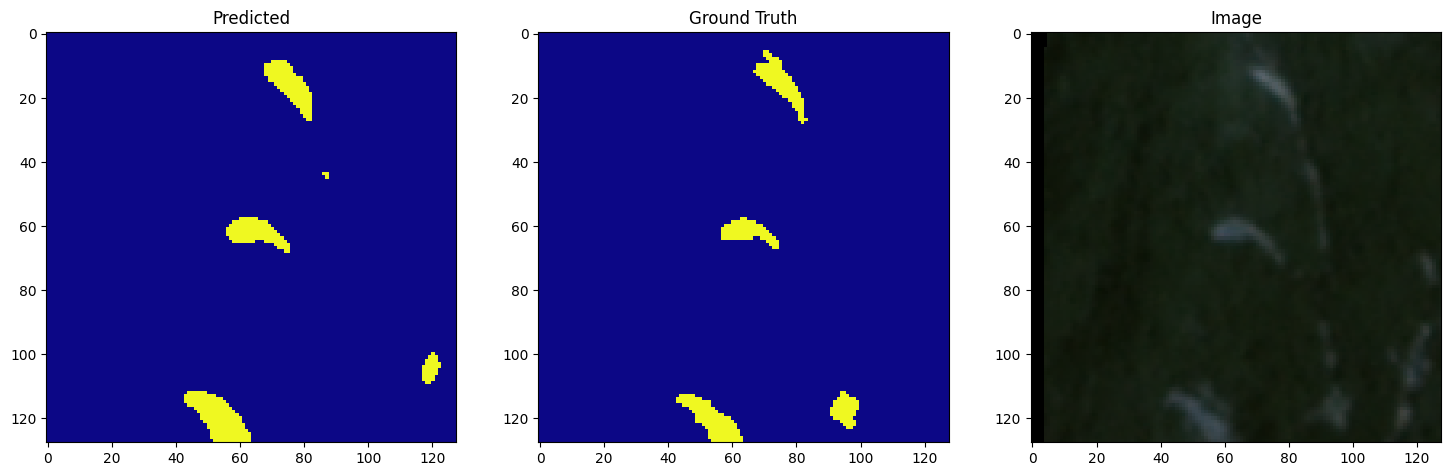

In [ ]:
n = 10  # sample number
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
im1 = ax[0].imshow(
    val_preds[n, :, :, :3].transpose((0, 1, 2)), vmin=0, vmax=1.0, cmap="plasma"
)
im2 = ax[1].imshow(y_test[n, :, :, 0], cmap="plasma")

ax[2].imshow(X_test[n, :, :, :3].transpose((0, 1, 2)))

ax[0].ticklabel_format(useOffset=False, style="plain")
ax[1].ticklabel_format(useOffset=False, style="plain")
ax[2].ticklabel_format(useOffset=False, style="plain")

ax[0].set_title("Predicted")
ax[1].set_title("Ground Truth")
ax[2].set_title("Image")

# fig.colorbar(im1, ax=ax[0])
# fig.colorbar(im2, ax=ax[1])